#**The Impact of COVID-19 in Open Source Software Development**

During the COVID-19, people had to change their habits in order to keep up with new regulations and changes. The concept of working from home is one of these changes. The working from home model, especially in the software industry, was quickly adapted and started to be implemented. In this project, carried out within the scope of PURE, it is investigated how the software developers were affected during the COVID-19 period, and whether various factors and situation itself played a role in the development of the software.

In this research, it is aimed to observe whether there is a change in the COVID-19 period by examining the commit numbers and other metrics of the projects on Github.

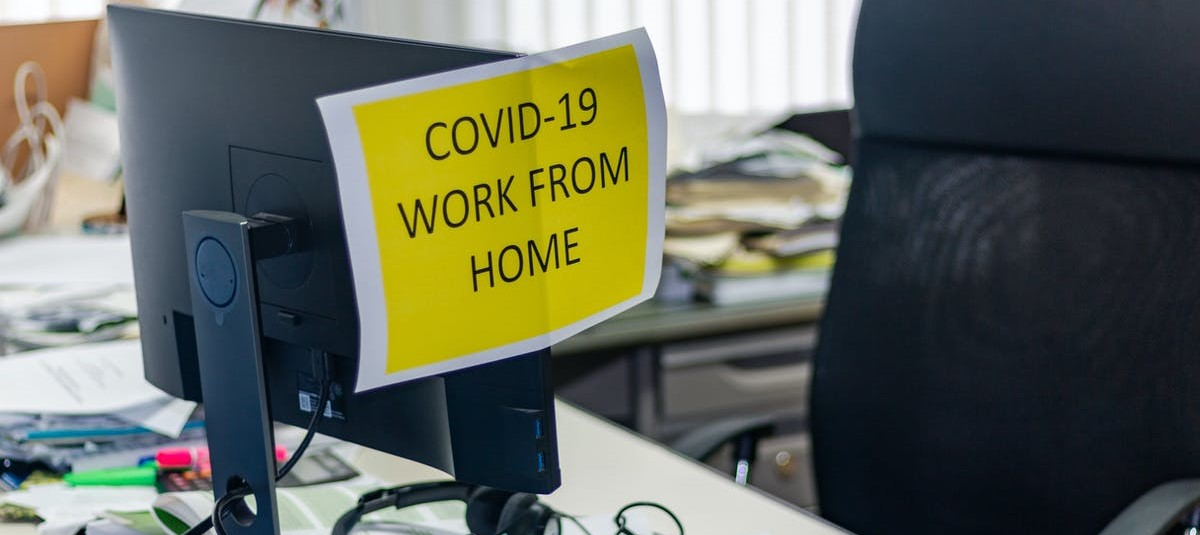

# Introduction

First, we chose a Python project from GitHub to analyze. You can find the link of the project [here](#). We cloned this project locally and turned all commit history into a json file. After that we made column distinctions by reading the data. Thus, we aimed to make the data we have more organized.

In [ ]:
from google.colab import drive
drive.mount("./drive/", force_remount=True)

Mounted at ./drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbr
import plotly.express as px #Interactive Plots
from datetime import datetime
from os.path import join
from scipy import stats
import plotly.graph_objects as go
import json


# to disable warning outputs
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

path_prefix = "./drive/My Drive/PURE/"
fname = "data.json"
df = pd.read_json(join(path_prefix, fname))

df.date = pd.to_datetime(df.date)
df["year"] = df["date"].apply(lambda x: x.strftime("%Y"))
df["month"] = df["date"].apply(lambda x: x.strftime("%m"))
df["day"] = df["date"].apply(lambda x: x.strftime("%d"))
df["times"] = df["date"].apply(lambda x: x.strftime("%H"))
df.head()

,commit,author,date,message,year,month,day,times
0,d82f2caf942fa8b94e797a2f116ee54ec303c2df,Erlend Egeberg Aasland <erlend.aasland@innova.no>,2021-11-23 08:52:05+01:00,bpo-45847-Port-_socket-to-PY_STDLIB_MOD-GH-29713,2021,11,23,08
1,758a23d1c4db97b578bc16e0ea110074d65c4c52,Erlend Egeberg Aasland <erlend.aasland@innova.no>,2021-11-23 08:51:30+01:00,bpo-45847-Fix-xxlimited-and-xxlimited_35-build...,2021,11,23,08
2,457e6a6e96b5afad403a0bc892508a77beef4d33,Neil Schemenauer <nas-github@arctrix.com>,2021-11-22 23:51:02-08:00,bpo-45561-Run-smelly.py-tool-from-srcdir-GH-29138,2021,11,22,23
3,024209401ebc8a011f242af00efdd8ecece6953d,Julien Palard <julien@palard.fr>,2021-11-23 00:17:54+01:00,bpo-42238-doc-Announce-the-future-removal-of-m...,2021,11,23,00
4,2dc7d3dda61e7ce07721f46b14c706fbc879dfd6,Erlend Egeberg Aasland <erlend.aasland@innova.no>,2021-11-22 21:27:05+01:00,bpo-45847-Port-xxlimited-and-xxlimited_35-to-P...,2021,11,22,21


## Exploratory Data Analysis of the Control Group

Before looking at the period of COVID-19, we examined the entire history of the project from beginning to end in order to conduct exploratory data analysis in general. 

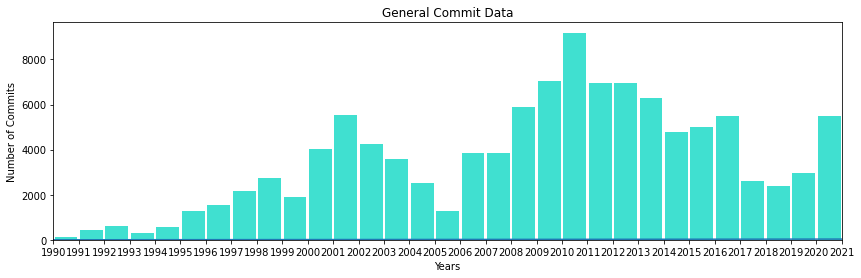

In [ ]:
df_year = df
df_year.sort_values(by=['year'], inplace=True)
plt.hist(df_year["year"], bins=31,rwidth=0.9, color="turquoise")
plt.xlabel("Years")
plt.ylabel("Number of Commits")
plt.title("General Commit Data")

N = 32
data = np.linspace(0, N, N)

plt.plot(data)

plt.xticks(range(N))

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()

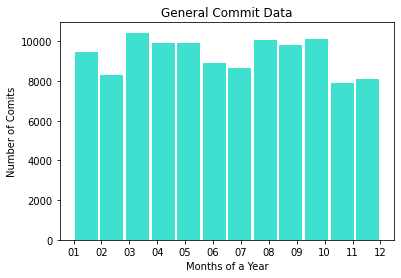

In [ ]:
df_month = df
df_month.sort_values(by=['month'], inplace=True)
plt.hist(df_month["month"], bins=12,rwidth=0.9, color="turquoise")
plt.xlabel("Months of a Year")
plt.ylabel("Number of Comits")
plt.title("General Commit Data")
plt.show()

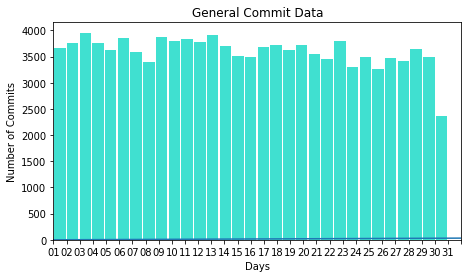

In [ ]:
df_days = df
df_days.sort_values(by=['day'], inplace=True)
plt.hist(df_days["day"], bins=31,rwidth=0.9, color="turquoise")
plt.xlabel("Days")
plt.ylabel("Number of Commits")
plt.title("General Commit Data")

N = 32
data = np.linspace(0, N, N)

plt.plot(data)

plt.xticks(range(N))

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()

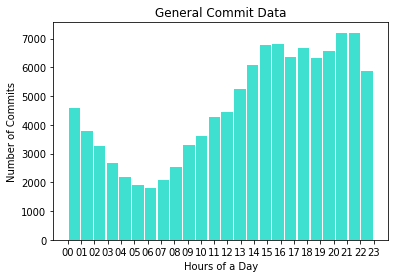

In [ ]:
df_hours = df
df_hours.sort_values(by=['times'], inplace=True)
plt.hist(df_hours["times"], bins=24,rwidth=0.9, color="turquoise")
plt.xlabel("Hours of a Day")
plt.ylabel("Number of Commits")
plt.title("General Commit Data")
plt.show()

In [ ]:
count_dict = {}
year_df = df[["year"]]
year_df
for i in range(len(year_df)):
  y = year_df.iloc[i][0]
  if y not in count_dict:
    count = year_df.loc[year_df['year'] == y].shape[0]
    count_dict[y] = count
    
count_dict = dict(sorted(count_dict.items(), key= lambda x: x[0], reverse=False))
df_count = pd.DataFrame(count_dict.items(), columns=['Date', 'Count'])
df_count.head()

,Date,Count
0,1990,105
1,1991,445
2,1992,627
3,1993,289
4,1994,582


In [ ]:
import plotly.graph_objects as go
yearVsCount =go.Figure()
yearVsCount.add_trace(go.Scatter(x=df_count['Date'], y= df_count['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
yearVsCount.update_layout(title='Year vs Number of Commits',height=300)
yearVsCount.show()

In [ ]:
countMonth_dict = {}
month_df = df[["month"]]

for i in range(len(month_df)):
  y = month_df.iloc[i][0]
  if y not in countMonth_dict:
    count = month_df.loc[month_df['month'] == y].shape[0]
    countMonth_dict[y] = count

countMonth_dict = dict(sorted(countMonth_dict.items(), key= lambda x: x[0], reverse=False))
df_countMonth = pd.DataFrame(countMonth_dict.items(), columns=['Months', 'Count'])
df_countMonth

,Months,Count
0,01,9450
1,02,8307
2,03,10432
3,04,9913
4,05,9913
5,06,8910
6,07,8649
7,08,10083
8,09,9796
9,10,10100


In [ ]:
monthVsCount =go.Figure()
monthVsCount.add_trace(go.Scatter(x=df_countMonth['Months'], y= df_countMonth['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commit Data",showlegend=True))
monthVsCount.update_layout(title='Months vs Number of Commits',height=300)
monthVsCount.show()

## User Based Monthly and Yearly Commit Data

After the exploratory analysis of the general data, we made a user-based research and analysed the monthly and yearly commit graphs of the most committed 5 users.

In [ ]:
countUser_dict = {}
user_df = df[["author"]]

for i in range(len(user_df)):
  y = user_df.iloc[i][0]
  if y not in countUser_dict:
    count = user_df.loc[user_df["author"] == y].shape[0]
    countUser_dict[y] = count
    
countUser_dict = dict(sorted(countUser_dict.items(), key= lambda x: x[1], reverse=True))
df_countUser = pd.DataFrame(countUser_dict.items(), columns=['User', 'Count'])
df_countUser.head()

,User,Count
0,Guido van Rossum <guido@python.org>,11080
1,Benjamin Peterson <benjamin@python.org>,5854
2,Georg Brandl <georg@python.org>,5677
3,Fred Drake <fdrake@acm.org>,5465
4,Serhiy Storchaka <storchaka@gmail.com>,4254


### Analysis of the Most Committed User

Starting with the most committed user, we tried to identify the commit characteristics of the user.

In [ ]:
df_usrCom_1 = df[(df["author"] == "Guido van Rossum <guido@python.org>")]
df_usrCom_1.sort_values(by=['date'], inplace=True)
df_usrCom_1.head()

,commit,author,date,message,year,month,day,times
111537,7f777ed95a19224294949e1b4ce56bbffcb1fe9f,Guido van Rossum <guido@python.org>,1990-08-09 14:25:15+00:00,Initial-revision,1990,08,09,14
111536,3310257195daa702bc91fb90e78ac96a30076336,Guido van Rossum <guido@python.org>,1990-09-10 11:15:23+00:00,Warning-about-incompleteness,1990,09,10,11
111535,b829a0935bbd3dea4898bf68b6be69b59bffcbec,Guido van Rossum <guido@python.org>,1990-09-18 10:47:40+00:00,Renamed-intro-and-modules-to-tut-and-mod-added...,1990,09,18,10
111534,eeaccbf068bf446a310e07fee988578d0b641ae9,Guido van Rossum <guido@python.org>,1990-10-07 12:35:21+00:00,Added-support-for-postscript-output-.ps,1990,10,07,12
111533,df79a1ee192231a75a381798bb35cefaf6c31a2a,Guido van Rossum <guido@python.org>,1990-10-07 12:35:53+00:00,New-names-etc,1990,10,07,12


In [ ]:
countUsr1_dict = {}
dfUser1_year = df_usrCom_1[["year"]]

for i in range(len(dfUser1_year)):
  y = dfUser1_year.iloc[i][0]
  if y not in countUsr1_dict:
    count = dfUser1_year.loc[dfUser1_year['year'] == y].shape[0]
    countUsr1_dict[y] = count
    
countUsr1_dict = dict(sorted(countUsr1_dict.items(), key= lambda x: x[0], reverse=False))
df_countUsr1 = pd.DataFrame(countUsr1_dict.items(), columns=['Year', 'Count'])
df_countUsr1.head()

,Year,Count
0,1990,105
1,1991,445
2,1992,606
3,1993,200
4,1994,525


In [ ]:
import plotly.graph_objects as go
yearVsCount1 =go.Figure()
yearVsCount1.add_trace(go.Scatter(x=df_countUsr1['Year'], y= df_countUsr1['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
yearVsCount1.update_layout(title='Year vs Number of Commits for Guido van Rossum',height=300)
yearVsCount1.show()

In [ ]:
countMonthUsr1_dict = {}
dfUser1_month = df_usrCom_1[["month"]]

for i in range(len(dfUser1_month)):
  y = dfUser1_month.iloc[i][0]
  if y not in countMonthUsr1_dict:
    count = dfUser1_month.loc[dfUser1_month['month'] == y].shape[0]
    countMonthUsr1_dict[y] = count
    
countMonthUsr1_dict = dict(sorted(countMonthUsr1_dict.items(), key= lambda x: x[0], reverse=False))
df_countUsr1month = pd.DataFrame(countMonthUsr1_dict.items(), columns=['Month', 'Count'])
df_countUsr1month.head()

,Month,Count
0,01,1112
1,02,776
2,03,834
3,04,1042
4,05,927


In [ ]:
import plotly.graph_objects as go
monthVsCount1 =go.Figure()
monthVsCount1.add_trace(go.Scatter(x=df_countUsr1month['Month'], y= df_countUsr1month['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
monthVsCount1.update_layout(title='Month vs Number of Commits for Guido van Rossum',height=300)
monthVsCount1.show()

### Analysis of the Second Most Committed User

Continuing with the second most committed user, we again tried to identify the commit characteristics of the user.

In [ ]:
df_usrCom_2 = df[(df["author"] == "Benjamin Peterson <benjamin@python.org>")]
df_usrCom_2.sort_values(by=['date'], inplace=True)
df_usrCom_2.head()

,commit,author,date,message,year,month,day,times
69380,6f7e71dc3241597d497c1d9f910a8a9798059463,Benjamin Peterson <benjamin@python.org>,2008-03-25 21:14:42+00:00,Merged-the-ACKS-from-py3k,2008,03,25,21
69379,548de7772519a95c5ad7c48d7debbd317dc5a43b,Benjamin Peterson <benjamin@python.org>,2008-03-25 21:14:46+00:00,Merged-the-ACKS-from-2.6,2008,03,25,21
69377,da868d6cf17c5620b1c614f89a83593c211d5dbd,Benjamin Peterson <benjamin@python.org>,2008-03-25 21:55:50+00:00,Opps-I-merged-the-revisions-but-forgot-to-add,2008,03,25,21
69365,13be2cf284d33ae7b241453939de4d01053b98b2,Benjamin Peterson <benjamin@python.org>,2008-03-26 11:57:47+00:00,Added-help-options-to-PDB,2008,03,26,11
69343,8113586723e98212a3ffc6aa83b6fc22a7ab5e70,Benjamin Peterson <benjamin@python.org>,2008-03-27 00:25:33+00:00,add-commas-for-introductory-clauses,2008,03,27,00


In [ ]:
countUsr2_dict = {}
dfUser2_year = df_usrCom_2[["year"]]

for i in range(len(dfUser2_year)):
  y = dfUser2_year.iloc[i][0]
  if y not in countUsr2_dict:
    count = dfUser2_year.loc[dfUser2_year['year'] == y].shape[0]
    countUsr2_dict[y] = count
    
countUsr2_dict = dict(sorted(countUsr2_dict.items(), key= lambda x: x[0], reverse=False))
df_countUsr2 = pd.DataFrame(countUsr2_dict.items(), columns=['Year', 'Count'])
df_countUsr2.head()

,Year,Count
0,2008,900
1,2009,1106
2,2010,959
3,2011,566
4,2012,545


In [ ]:
import plotly.graph_objects as go
yearVsCount2 =go.Figure()
yearVsCount2.add_trace(go.Scatter(x=df_countUsr2['Year'], y= df_countUsr2['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
yearVsCount2.update_layout(title='Year vs Number of Commits for Benjamin Peterson',height=300)
yearVsCount2.show()

In [ ]:
countMonthUsr2_dict = {}
dfUser2_month = df_usrCom_2[["month"]]

for i in range(len(dfUser2_month)):
  y = dfUser2_month.iloc[i][0]
  if y not in countMonthUsr2_dict:
    count = dfUser2_month.loc[dfUser2_month['month'] == y].shape[0]
    countMonthUsr2_dict[y] = count
    
countMonthUsr2_dict = dict(sorted(countMonthUsr2_dict.items(), key= lambda x: x[0], reverse=False))
df_countUsr2month = pd.DataFrame(countMonthUsr2_dict.items(), columns=['Month', 'Count'])
df_countUsr2month.head()

,Month,Count
0,01,521
1,02,326
2,03,667
3,04,533
4,05,618


In [ ]:
import plotly.graph_objects as go
monthVsCount2 =go.Figure()
monthVsCount2.add_trace(go.Scatter(x=df_countUsr2month['Month'], y= df_countUsr2month['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
monthVsCount2.update_layout(title='Month vs Number of Commits for Benjamin Peterson',height=300)
monthVsCount2.show()

### Analysis of the Third Most Committed User

We continued to identify the commit characteristics for the third, fourth and fifth most committed users.

In [ ]:
df_usrCom_3 = df[(df["author"] == "Georg Brandl <georg@python.org>")]
df_usrCom_3.sort_values(by=['date'], inplace=True)
df_usrCom_3.head()

,commit,author,date,message,year,month,day,times
79557,268e61cf7458d85d2e100480635390ebd480088f,Georg Brandl <georg@python.org>,2005-06-03 14:28:50+00:00,Bug-1213894-os.path.realpath-didn-t-resolve-sy...,2005,06,03,14
79553,6b95f1d963d3fd2dcc2e84e83b514364e9f52006,Georg Brandl <georg@python.org>,2005-06-03 19:47:00+00:00,Bug-1194181-bz2.BZ2File-didn-t-handle-mode-U-c...,2005,06,03,19
79549,9166e1a24ac7b15776ffd38e436fa51a9b002674,Georg Brandl <georg@python.org>,2005-06-04 09:20:03+00:00,Bug-1196315-fix-weakref.WeakValueDictionary-co...,2005,06,04,09
79548,89f000e7a8d1569b57ad029004ef76dc5e2956d8,Georg Brandl <georg@python.org>,2005-06-04 10:01:15+00:00,Bug-1210001-typo-in-email-doc,2005,06,04,10
79546,b6c1bb883e311fb60e8e54d6d5256d2f52941b4b,Georg Brandl <georg@python.org>,2005-06-05 10:56:59+00:00,Bug-1184380-extending-embedding-example-broken,2005,06,05,10


In [ ]:
countUsr3_dict = {}
dfUser3_year = df_usrCom_3[["year"]]

for i in range(len(dfUser3_year)):
  y = dfUser3_year.iloc[i][0]
  if y not in countUsr3_dict:
    count = dfUser3_year.loc[dfUser3_year['year'] == y].shape[0]
    countUsr3_dict[y] = count
    
countUsr3_dict = dict(sorted(countUsr3_dict.items(), key= lambda x: x[0], reverse=False))
df_countUsr3 = pd.DataFrame(countUsr3_dict.items(), columns=['Year', 'Count'])
df_countUsr3.head()

,Year,Count
0,2005,165
1,2006,522
2,2007,620
3,2008,1005
4,2009,985


In [ ]:
import plotly.graph_objects as go
yearVsCount3 =go.Figure()
yearVsCount3.add_trace(go.Scatter(x=df_countUsr3['Year'], y= df_countUsr3['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
yearVsCount3.update_layout(title='Year vs Number of Commits for Georg Brandl',height=300)
yearVsCount3.show()

In [ ]:
countMonthUsr3_dict = {}
dfUser3_month = df_usrCom_3[["month"]]

for i in range(len(dfUser3_month)):
  y = dfUser3_month.iloc[i][0]
  if y not in countMonthUsr3_dict:
    count = dfUser3_month.loc[dfUser3_month['month'] == y].shape[0]
    countMonthUsr3_dict[y] = count
    
countMonthUsr3_dict = dict(sorted(countMonthUsr3_dict.items(), key= lambda x: x[0], reverse=False))
df_countUsr3month = pd.DataFrame(countMonthUsr3_dict.items(), columns=['Month', 'Count'])
df_countUsr3month.head()

,Month,Count
0,01,440
1,02,409
2,03,631
3,04,399
4,05,574


In [ ]:
import plotly.graph_objects as go
monthVsCount3 =go.Figure()
monthVsCount3.add_trace(go.Scatter(x=df_countUsr3month['Month'], y= df_countUsr3month['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
monthVsCount3.update_layout(title='Month vs Number of Commits for Georg Brandl',height=300)
monthVsCount3.show()

## Exploratory Data Analysis of the Post-Covid Data

Now, by doing a year-by-year research, we get the period from the initial phase of COVID.

In [ ]:
df_recent = df[(df["year"] == "2020")]
df_recent.sort_values(by=['date'], inplace=True)
df_recent.head()

,commit,author,date,message,year,month,day,times
5480,22424c02e51fab3b62cbe255d0b87d1b55b9a6c3,Anthony Sottile <asottile@umich.edu>,2020-01-01 01:11:16-05:00,Document-CodeType.replace-GH-17776,2020,01,01,01
5479,46abfc1416ff8e450999611ef8f231ff871ab133,Vinay Sajip <vinay_sajip@yahoo.co.uk>,2020-01-01 19:32:11+00:00,bpo-39142-Avoid-converting-namedtuple-instance...,2020,01,01,19
5478,5b9077134cd0535f21905d5f5195847526cac99c,Jendrik Seipp <jendrikseipp@gmail.com>,2020-01-01 23:21:43+01:00,bpo-13601-always-use-line-buffering-for-sys.st...,2020,01,01,23
5477,149175c6dfc8455023e4335575f3fe3d606729f9,Rafael Fontenelle <rffontenelle@users.noreply....,2020-01-01 19:26:33-03:00,bpo-39183-Fix-formatting-in-library-ensurepip-...,2020,01,01,19
5476,04ec7a1f7a5b92187a73cd02670958444c6f2220,Pablo Galindo <Pablogsal@gmail.com>,2020-01-02 11:38:44+00:00,bpo-39114-Fix-tracing-of-except-handlers-with-...,2020,01,02,11


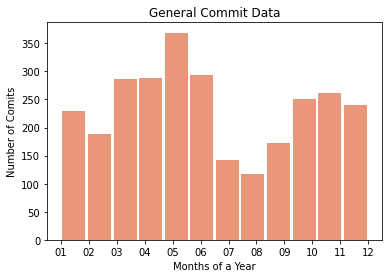

In [ ]:
df_postCov_month = df_recent
df_postCov_month.sort_values(by=['month'], inplace=True)
plt.hist(df_postCov_month["month"], bins=12,rwidth=0.9, color="darksalmon")
plt.xlabel("Months of a Year")
plt.ylabel("Number of Comits")
plt.title("General Commit Data")
plt.show()

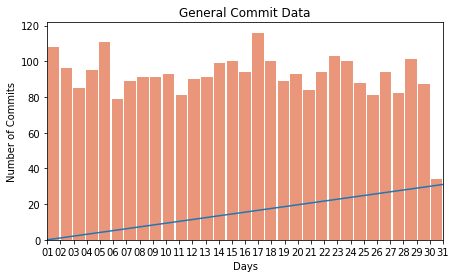

In [ ]:
df_postCov_days = df_recent
df_postCov_days.sort_values(by=['day'], inplace=True)
plt.hist(df_postCov_days["day"], bins=31,rwidth=0.9, color="darksalmon")
plt.xlabel("Days")
plt.ylabel("Number of Commits")
plt.title("General Commit Data")

N = 31
data = np.linspace(0, N, N)

plt.plot(data)

plt.xticks(range(N))

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()

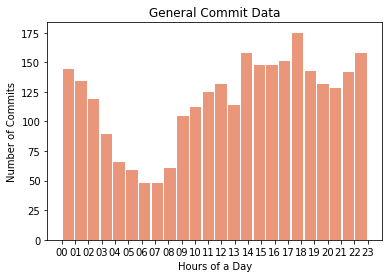

In [ ]:
df_postCov_hours = df_recent
df_postCov_hours.sort_values(by=['times'], inplace=True)
plt.hist(df_postCov_hours["times"], bins=24,rwidth=0.9, color="darksalmon")
plt.xlabel("Hours of a Day")
plt.ylabel("Number of Commits")
plt.title("General Commit Data")
plt.show()

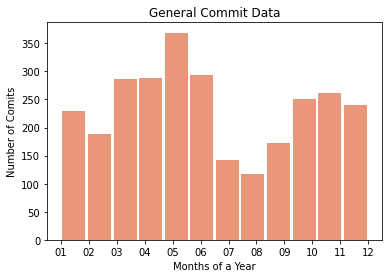

In [ ]:
df_recent_2 = df[(df["year"] == "2020")]
df_recent_2.sort_values(by=['date'], inplace=True)
df_postCov_month2 = df_recent_2
df_postCov_month2.sort_values(by=['month'], inplace=True)
plt.hist(df_postCov_month2["month"], bins=12,rwidth=0.9, color="darksalmon")
plt.xlabel("Months of a Year")
plt.ylabel("Number of Comits")
plt.title("General Commit Data")
plt.show()

In [ ]:
import plotly.graph_objects as go
yearVsAc =go.Figure()
yearVsAc.add_trace(go.Scatter(x=df_count['Date'], y= df_count['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="Commits",showlegend=True))
yearVsAc.update_layout(title='Year Vs Number of commits',height=300)
yearVsAc.show()

##Before and After COVID-19: Comparing the number of commits

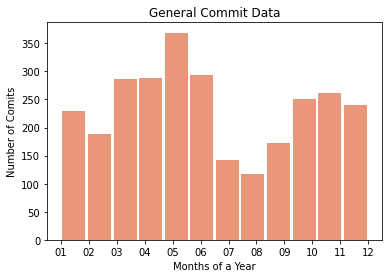

In [ ]:
df_recent_2 = df[(df["year"] == "2020")]
df_recent_2.sort_values(by=['date'], inplace=True)
df_postCov_month2 = df_recent_2
df_postCov_month2.sort_values(by=['month'], inplace=True)
plt.hist(df_postCov_month2["month"], bins=12,rwidth=0.9, color="darksalmon")
plt.xlabel("Months of a Year")
plt.ylabel("Number of Comits")
plt.title("General Commit Data")
plt.show()



In [ ]:
count_dict2 = {}
year_df2 = df[(df["year"] == "2019")]
year_df2 = year_df2[["month"]]

for i in range(len(year_df2)):
  y = year_df2.iloc[i][0]
  if y not in count_dict2:
    count = year_df2.loc[year_df2['month'] == y].shape[0]
    count_dict2[y] = count

count_dict2 = dict(sorted(count_dict2.items(), key= lambda x: x[0], reverse=False))
df_count = pd.DataFrame(count_dict2.items(), columns=['Months', 'Count'])
df_count

,Months,Count
0,01,134
1,02,176
2,03,285
3,04,229
4,05,441
5,06,340
6,07,192
7,08,215
8,09,436
9,10,192


In [ ]:
count_dict3 = {}
year_df3 = df[(df["year"] == "2020")]
year_df3 = year_df3[["month"]]

for i in range(len(year_df3)):
  y = year_df3.iloc[i][0]
  if y not in count_dict3:
    count = year_df3.loc[year_df3['month'] == y].shape[0]
    count_dict3[y] = count

count_dict3 = dict(sorted(count_dict3.items(), key= lambda x: x[0], reverse=False))
df_count2 = pd.DataFrame(count_dict3.items(), columns=['Months', 'Count'])
df_count2

,Months,Count
0,01,229
1,02,189
2,03,286
3,04,288
4,05,369
5,06,294
6,07,142
7,08,118
8,09,172
9,10,250


In [ ]:

yearVsAc2 =go.Figure()
yearVsAc2.add_trace(go.Scatter(x=df_count['Months'], y= df_count['Count'],mode='markers + lines', marker = {'color' : 'teal'},name="2019 Commits",showlegend=True))
yearVsAc2.add_trace(go.Scatter(x=df_count2['Months'], y= df_count2['Count'],mode='markers + lines', marker = {'color' : 'coral'},name="2020 Commits",showlegend=True))
yearVsAc2.update_layout(title='months Vs Number of commits',height=300)
yearVsAc2.show()